In [108]:
import pandas as pd
data = pd.read_csv('fries_data.csv')

In [109]:
data.head()

,Unnamed: 0,temparature
0,2020-01-10 00:00:00,62
1,2020-01-10 00:15:00,58
2,2020-01-10 00:30:00,56
3,2020-01-10 00:45:00,39
4,2020-01-10 01:00:00,42


In [110]:
data['datetime'] = pd.to_datetime(data['Unnamed: 0'])
data = data.set_index('datetime')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,temparature
datetime,
2020-01-10 00:00:00,62
2020-01-10 00:15:00,58
2020-01-10 00:30:00,56
2020-01-10 00:45:00,39
2020-01-10 01:00:00,42


In [111]:
from statsmodels.tsa.stattools import adfuller
print("p-value:", adfuller(data['temparature'])[1])

p-value: 0.0


In [112]:
data_map = data['temparature'].resample('30T').mean()
data_map.head()

datetime
2020-01-10 00:00:00    60.0
2020-01-10 00:30:00    47.5
2020-01-10 01:00:00    51.0
2020-01-10 01:30:00    39.0
2020-01-10 02:00:00    43.0
Freq: 30T, Name: temparature, dtype: float64

In [113]:
'''
H0: Not stationary
h1: stationary

calculate p-value. 

If p-value < alpha(significance level), we can reject null hypothesis and accept altenate hypothesis saying that data is stationary.
If p-value > alpha(significance level), we can accept null hypothesis saying that data is not stationary.
'''
print("p-value:", adfuller(data)[1])

p-value: 0.0


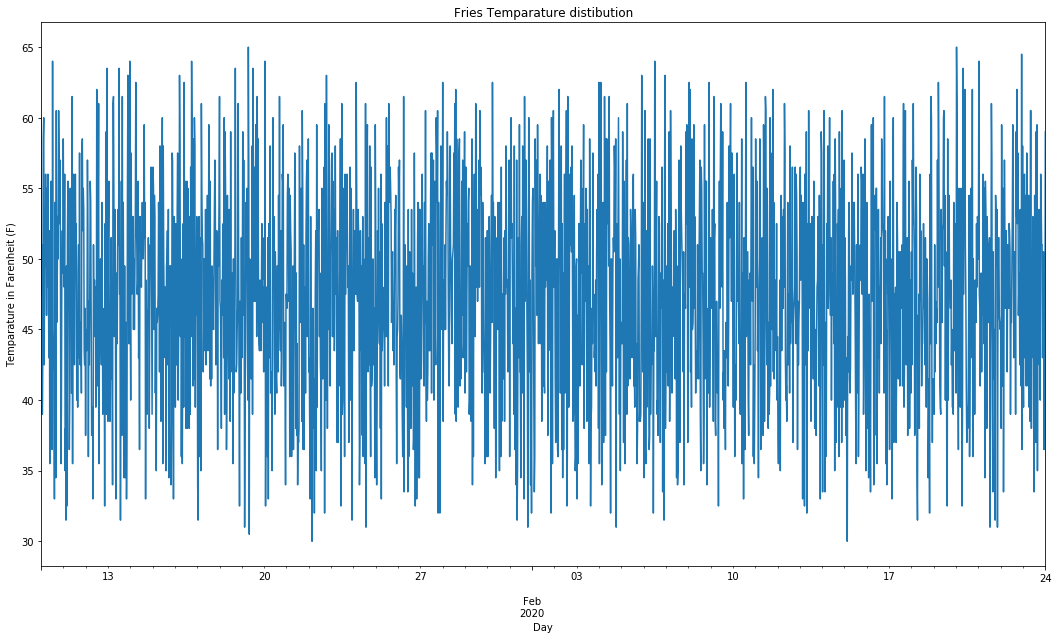

In [114]:
import matplotlib.pyplot as plt
data_map.plot(figsize=(18, 10))
plt.title('Fries Temparature distibution')
plt.xlabel('Day')
plt.ylabel('Temparature in Farenheit (F)')
plt.show()

### Fitting Arima model

In [115]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(data_map, order=(3,1,2), freq=data_map.index.inferred_freq)
results = model_arima.fit()

C:\Users\jagad\Anaconda3\envs\iiot_env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [116]:
type(results)

statsmodels.tsa.arima_model.ARIMAResultsWrapper

In [117]:
results.summary()

C:\Users\jagad\Anaconda3\envs\iiot_env\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\jagad\Anaconda3\envs\iiot_env\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\jagad\Anaconda3\envs\iiot_env\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\jagad\Anaconda3\envs\iiot_env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.temparature   No. Observations:                 2160
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -7393.646
Method:                       css-mle   S.D. of innovations              7.406
Date:                Tue, 25 Feb 2020   AIC                          14801.293
Time:                        13:36:04   BIC                          14841.038
Sample:                    01-10-2020   HQIC                         14815.830
                         - 02-24-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0001      0.000     -0.485      0.628      -0.001       0.000
ar.L1.D.temparature    -0.9857        nan        nan        nan         nan         nan
ar.L2.D.temparature    -0.0264      0.030     -0.876      0.381      -0.085       0.033
ar.L3.D.temparature    -0.0075      0.019     -0.404      0.686      -0.044       0.029
ma.L1.D.temparature    -0.0327        nan        nan        nan         nan         nan
ma.L2.D.temparature    -0.9670        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0347           -0.0000j            1.0347           -0.5000
AR.2           -1.2390          -11.2785j           11.3463           -0.2674
AR.3           -1.2390          +11.2785j           11.3463            0.2674
MA.1            1.0001           +0.0000j            1.0001            0.0000
MA.2           -1.0339           +0.0000j            1.0339            0.5000
-----------------------------------------------------------------------------
"""

In [118]:
final_pred = results.forecast(5)
final_pred

(array([47.16920648, 47.19834532, 47.35748291, 47.28842446, 47.35183372]),
 array([7.40626529, 7.40751303, 7.40774905, 7.40775384, 7.4077547 ]),
 array([[32.65319326, 61.68521971],
        [32.67988656, 61.71680408],
        [32.83856157, 61.87640425],
        [32.76949372, 61.8073552 ],
        [32.83290129, 61.87076615]]))

In [119]:
data_map.tail()

datetime
2020-02-23 22:00:00    50.5
2020-02-23 22:30:00    36.5
2020-02-23 23:00:00    50.0
2020-02-23 23:30:00    42.5
2020-02-24 00:00:00    59.0
Freq: 30T, Name: temparature, dtype: float64

In [120]:
final_pred[0]

array([47.16920648, 47.19834532, 47.35748291, 47.28842446, 47.35183372])

In [121]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

In [122]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [123]:
for param in pdq:
    mod = ARIMA(data_map, order=param, freq=data_map.index.inferred_freq)
    result = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, result.aic))
    

ARIMA(0, 0, 0) - AIC:14790.564954030535
ARIMA(0, 0, 1) - AIC:14791.797702701384
ARIMA(0, 1, 0) - AIC:16319.24878821481
ARIMA(0, 1, 1) - AIC:14794.175379349945
ARIMA(1, 0, 0) - AIC:14791.811018241071
ARIMA(1, 0, 1) - AIC:14792.286204832515
ARIMA(1, 1, 0) - AIC:15686.7519448225
ARIMA(1, 1, 1) - AIC:14795.449658569705


In [124]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [125]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(data_map,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:22857.459107480267
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:20634.317865686076
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:16212.593975187501
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:14657.204148836143
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:16196.267948478957
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:14744.962191774943
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:15465.72267472712
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:14658.647736658831
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:20685.30665574044
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:19357.724114824276
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:16207.333859865346
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:14652.524205252583


C:\Users\jagad\Anaconda3\envs\iiot_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:16201.450359284485


C:\Users\jagad\Anaconda3\envs\iiot_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:14746.142675347768
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:15466.920669766183
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:14653.72065381859
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:16309.296090676431
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:16223.957006787668
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:17713.767430989225
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:16158.833796762372
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:16231.24483036544
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:16225.61399093388
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:16976.116348185642
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:16160.735681528688
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:14777.039865923476
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:14698.979069794568
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:16207.75304282243
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:14657.68081560345
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:14711.308720401
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:14701.006826599762
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:15469.146010200986


## Prophet 

In [56]:
from matplotlib import pyplot as plt
from fbprophet import Prophet

In [57]:
dataframe_map = data_map.to_frame()

In [58]:
dataframe_map.reset_index(level=0, inplace=True)

In [59]:
dataframe_map

,datetime,temparature
0,2020-01-10 00:00:00,53.75
1,2020-01-10 01:00:00,45.00
2,2020-01-10 02:00:00,50.75
3,2020-01-10 03:00:00,51.25
4,2020-01-10 04:00:00,50.25
...,...,...
1076,2020-02-23 20:00:00,51.00
1077,2020-02-23 21:00:00,45.00
1078,2020-02-23 22:00:00,43.50
1079,2020-02-23 23:00:00,46.25


In [60]:
dataframe_map = dataframe_map.rename(columns={"datetime":"ds", "temparature":"y"})

In [61]:
dataframe_map.columns

Index(['ds', 'y'], dtype='object')

In [126]:
mod_prophet = Prophet(seasonality_mode='additive')
mod_prophet.fit(dataframe_map)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [136]:
future = mod_prophet.make_future_dataframe(periods=2400, freq='15T')
future

,ds
0,2020-01-10 00:00:00
1,2020-01-10 01:00:00
2,2020-01-10 02:00:00
3,2020-01-10 03:00:00
4,2020-01-10 04:00:00
...,...
3476,2020-03-19 23:00:00
3477,2020-03-19 23:15:00
3478,2020-03-19 23:30:00
3479,2020-03-19 23:45:00


In [137]:
forecast = mod_prophet.predict(future)
forecast[['ds', 'yhat']]

,ds,yhat
0,2020-01-10 00:00:00,47.576385
1,2020-01-10 01:00:00,47.080208
2,2020-01-10 02:00:00,46.914113
3,2020-01-10 03:00:00,47.226388
4,2020-01-10 04:00:00,47.701721
...,...,...
3476,2020-03-19 23:00:00,47.605893
3477,2020-03-19 23:15:00,47.555318
3478,2020-03-19 23:30:00,47.475819
3479,2020-03-19 23:45:00,47.372296


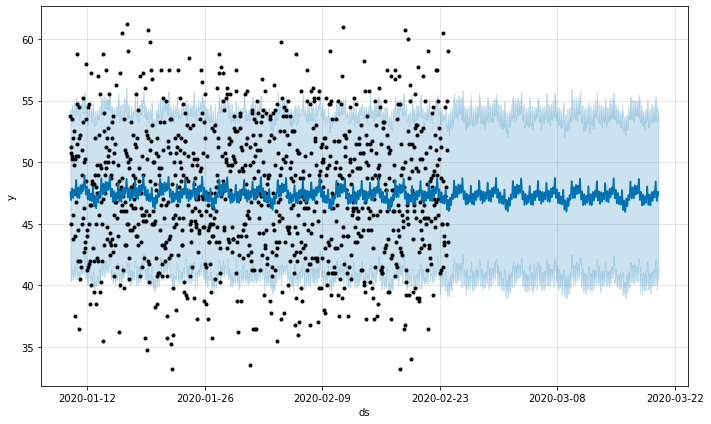

In [138]:
fig1 = mod_prophet.plot(forecast)